# Homework


#### The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

## Imports

In [4]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Q1. Downloading the data



##### We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

#### Download the data for January and February 2023.


In [7]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

/Users/epam/.zshenv:12: command not found: Next
--2024-08-05 23:57:17--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.84.111.30, 52.84.111.52, 52.84.111.169, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|52.84.111.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  33.5MB/s    in 1.4s    

2024-08-05 23:57:19 (33.5 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]

/Users/epam/.zshenv:12: command not found: Next
--2024-08-05 23:57:19--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.84.111.30, 52.84.111.52, 52.84.111.169, ...
Connecting to 


#### Read the data for January. 


In [9]:
yellow_tripdata_2023_01 = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [10]:
yellow_tripdata_2023_01.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.0,0.5,15.0,0.0,1.0,34.9,2.5,0.0


In [11]:
yellow_tripdata_2023_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### How many columns are there?

In [13]:
print(f'In "Yellow Taxi Trip Records" for for January 2023 there are {yellow_tripdata_2023_01.shape[1]} columns')

In "Yellow Taxi Trip Records" for for January 2023 there are 19 columns


### Q2. Computing duration

#### Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 



In [16]:
yellow_tripdata_2023_01['duration'] = yellow_tripdata_2023_01.apply(lambda x: x['tpep_dropoff_datetime']-x['tpep_pickup_datetime'],axis=1 ).dt.total_seconds()/60
yellow_tripdata_2023_01['duration'][:3]

0     8.433333
1     6.316667
2    12.750000
Name: duration, dtype: float64

#### What's the standard deviation of the trips duration in January?

In [18]:
print(f'The Standart Deviation of the trips duration in January 2023 is {round(yellow_tripdata_2023_01["duration"].std(),2)} minutes')

The Standart Deviation of the trips duration in January 2023 is 42.59 minutes


### Q3. Dropping outliers

#### Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).



In [21]:
yellow_tripdata_2023_01.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

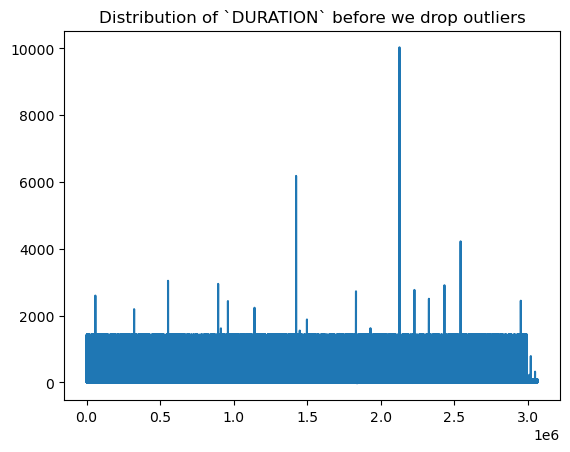

In [22]:
yellow_tripdata_2023_01.duration.plot(title="Distribution of `DURATION` before we drop outliers");

In [23]:
yellow_tripdata_2023_01_no_outliers = yellow_tripdata_2023_01.where((yellow_tripdata_2023_01.duration >=1) & (yellow_tripdata_2023_01.duration<=60))

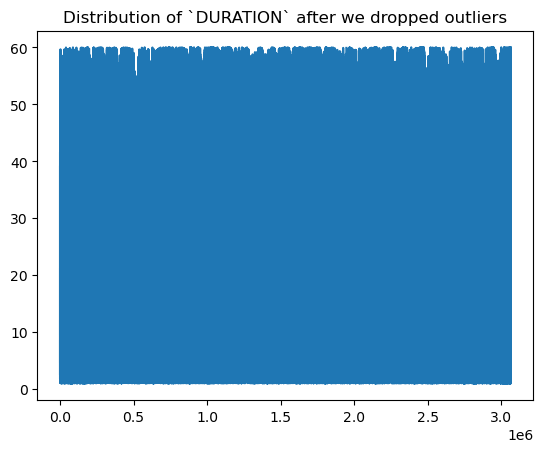

In [24]:
yellow_tripdata_2023_01_no_outliers.duration.plot(title="Distribution of `DURATION` after we dropped outliers");

In [26]:
#dropna
nona_df = yellow_tripdata_2023_01_no_outliers.dropna(subset=['duration'])

In [27]:
nona_df.duration.isna().sum()

0

#### What fraction of the records left after you dropped the outliers?

In [28]:
print(f'After we dropped the outliers, the fraction of {round(len(nona_df)/len(yellow_tripdata_2023_01)*100)}% of records is left')

After we dropped the outliers, the fraction of 98% of records is left


### Q4. One-hot encoding

#### Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 



In [32]:
#check the dtype before the cast
type(nona_df['PULocationID'][0])

numpy.float64

In [33]:
df_encoded = nona_df[['PULocationID', 'DOLocationID']].astype(str)

In [34]:
#check the dtype after the cast
type(df_encoded.PULocationID[0])

str

#### Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)


In [36]:
df_dicts = df_encoded.to_dict(orient='records')

#### Fit a dictionary vectorizer 


In [38]:
vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(df_dicts)

#### Get a feature matrix from it


In [40]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>


#### What's the dimensionality of this matrix (number of columns)?

In [42]:
print(f'The dimensionality of this matrix is {X_train.shape},\n Number of columns is {X_train.shape[1]}')

The dimensionality of this matrix is (3009173, 515),
 Number of columns is 515


### Q5. Training a model

#### Now let's use the feature matrix from the previous step to train a model. 


In [45]:
y_train = nona_df['duration'].values


#### Train a plain linear regression model with default parameters, where duration is the response variable


In [47]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_train)

#### Calculate the RMSE of the model on the training data



In [49]:
rmse = mean_squared_error(y_train, y_pred, squared=False)

#### What's the RMSE on train?

In [51]:
print(f'RMSE of the model on the training data is {round(rmse,3)}')

RMSE of the model on the training data is 7.649


### Q6. Evaluating the model

#### Now let's apply this model to the validation dataset (February 2023). 




In [55]:
# Read the data from feb dataset
yellow_tripdata_2023_02 = pd.read_parquet('yellow_tripdata_2023-02.parquet')
# Computing duration
yellow_tripdata_2023_02['duration'] = yellow_tripdata_2023_02.apply(lambda x: x['tpep_dropoff_datetime']-x['tpep_pickup_datetime'],axis=1 ).dt.total_seconds()/60
# Drop outliers
yellow_tripdata_2023_02_no_outliers = yellow_tripdata_2023_02.where((yellow_tripdata_2023_02.duration >=1) & (yellow_tripdata_2023_02.duration<=60))
# Dropna
nona_df_feb = yellow_tripdata_2023_02_no_outliers.dropna(subset=['duration'])
# Cast to str
df_encoded_feb = nona_df_feb[['PULocationID', 'DOLocationID']].astype(str)
# Turn to dict
df_dicts_feb = df_encoded_feb.to_dict(orient='records')
# Vectorize with the same vectorizer
X_test = vectorizer.transform(df_dicts_feb)
# Predict on test data
y_pred_test = logreg.predict(X_test)
# Calcukare rmse
y_test = nona_df_feb['duration'].values
rmse_val = mean_squared_error(y_test, y_pred_test, squared=False)

#### What's the RMSE on validation?

In [57]:
print(f'RMSE of the model on the  validation data is {round(rmse_val,3)}')

RMSE of the model on the  validation data is 7.812
